In [ ]:
!pip install diffusers transformers accelerate

# Creating Image and Audio Files Using Huggingface LLM Models on Google Colab

The objective of this project is to take an initial step toward building an AI app capable of generating images and audio files for marketing purposes.
In this project, I logged into the Huggingface website and used the text-to-image LLM model black-forest-labs/FLUX.1-schnell to create images. The FLUX.1-schnell model is part of the FLUX.1 suite developed by Black Forest Labs, known for its high-quality image generation and prompt adherence. It is optimized for local development and personal use, making it accessible for individuals and small teams.
Additionally, I utilized the microsoft/speecht5_tts text-to-audio LLM model to generate audio files. The SpeechT5 model, developed by Microsoft, is a unified-modal encoder-decoder pre-training framework for spoken language processing. It supports various tasks such as speech synthesis, automatic speech recognition, and speech-to-speech translation.
All code was run on Google Colab using an A100 instance, leveraging the powerful computational resources available on the platform.

In [ ]:
from huggingface_hub import login
from google.colab import userdata


hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

## This next cell will only work on a powerful GPU box like an A100 due to need very big memory



In [ ]:
import torch
from diffusers import FluxPipeline

# Load the model in float16 precision and enable CPU offloading
pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.float16)
pipe.enable_model_cpu_offload() # This will keep the model on the CPU and only move parts to the GPU when needed

generator = torch.Generator(device="cuda").manual_seed(0)
prompt = "Create a AI coding online course image in the surreal style of Salvador Dali"

# Generate the image using the GPU
image = pipe(
    prompt,
    guidance_scale=0.0,
    num_inference_steps=4,
    max_sequence_length=256,
    generator=generator
).images[0]

image.save("surreal.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

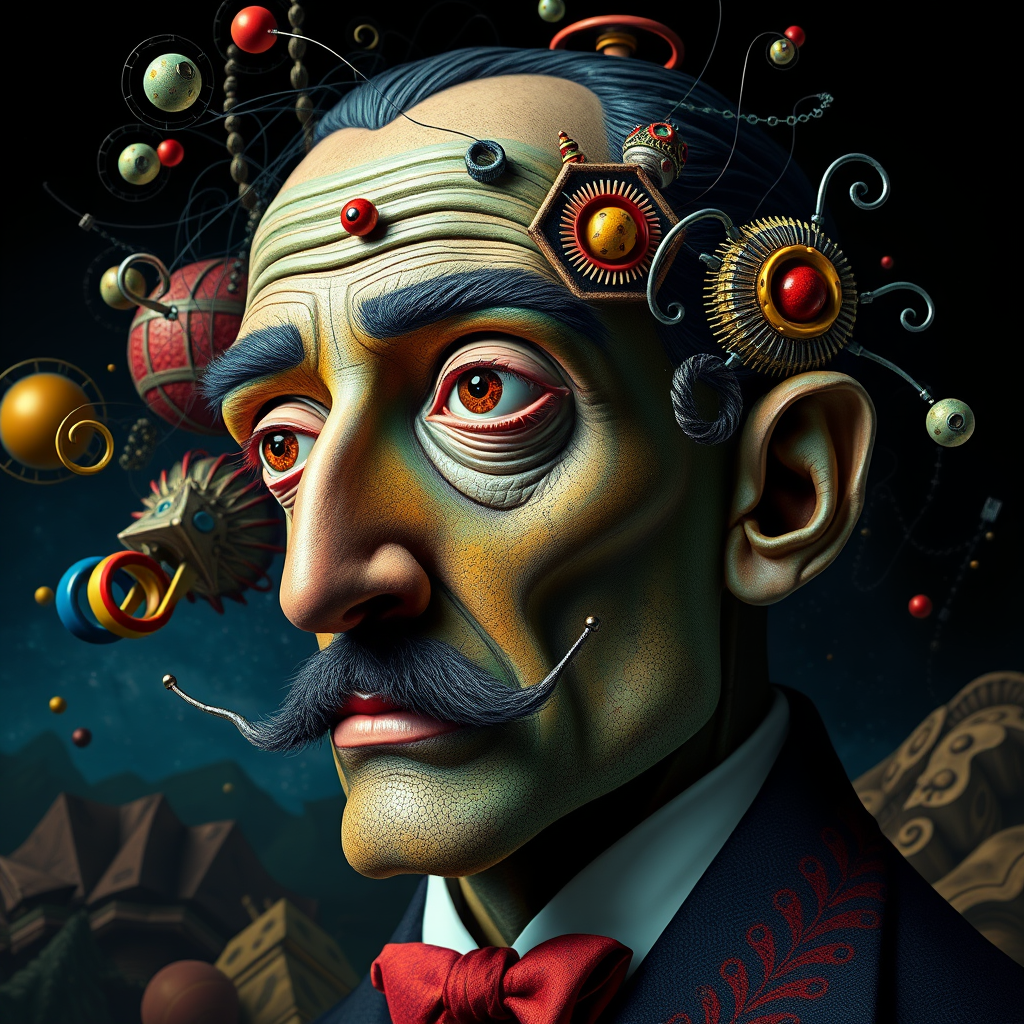

In [ ]:
from IPython.display import display
from PIL import Image

# Display the image inline
display(image)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import pipeline
from datasets import load_dataset
import soundfile as sf
import torch

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser("Hello to an AI engineer on the path to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])

Device set to use cuda


In [ ]:
from IPython.display import Audio

# Play the generated audio
Audio("speech.wav")